In [9]:
import matplotlib.pyplot as plt
import datetime

In [10]:
c = open("Data/carrotPrices.csv","r")
cdata={}

firstLine = c.readline().strip("\n").split(",")[1:]

for name in firstLine:
    cdata[name] = []

for line in c:
    line = line.strip("\n").split(",")[1:]
    tempdata = [int(i) for i in line[0].split("-")]
    tempDATE = datetime.date(tempdata[0],tempdata[1],tempdata[2])
    
    cdata["date"].append(tempDATE)
    cdata["price"].append(float(line[1]))

c.close()

In [11]:
c = open("Data/onionPrices.csv","r")
odata={}

firstLine = c.readline().strip("\n").split(",")[1:]

for name in firstLine:
    odata[name] = []

for line in c:
    line = line.strip("\n").split(",")[1:]
    tempdata = [int(i) for i in line[0].split("-")]
    tempDATE = datetime.date(tempdata[0],tempdata[1],tempdata[2])
    
    odata["date"].append(tempDATE)
    odata["price"].append(float(line[1]))

c.close()

2 49
47
0.004652084961312977
23 44
21
0.0055310285542357765


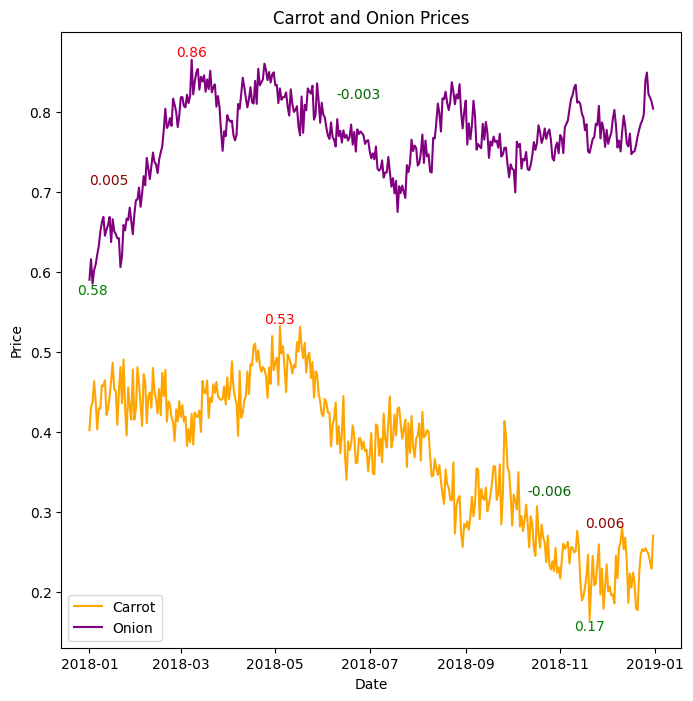

In [14]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)

ax.plot(cdata["date"],cdata["price"],c="orange",label="Carrot")
ax.plot(odata["date"],odata["price"],c="purple",label="Onion")

ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.set_title("Carrot and Onion Prices")

ax.legend(loc="lower left")

peakCprice = max(cdata["price"])
pcpriceindex = cdata["price"].index(max(cdata["price"]))
peakOprice = max(odata["price"])
popriceindex = odata["price"].index(max(odata["price"]))

ax.text(cdata["date"][pcpriceindex],
        cdata["price"][pcpriceindex],
        round(peakCprice,2),
        horizontalalignment="center",
        verticalalignment="bottom",
        color = "red")

ax.text(odata["date"][popriceindex],
        odata["price"][popriceindex],
        round(peakOprice,2),
        horizontalalignment="center",
        verticalalignment="bottom",
        color = "red")


lowCprice = min(cdata["price"])
lcpriceindex = cdata["price"].index(lowCprice)
lowOprice = min(odata["price"])
lopriceindex = odata["price"].index(lowOprice)

ax.text(cdata["date"][lcpriceindex],
        cdata["price"][lcpriceindex],
        round(lowCprice,2),
        horizontalalignment="center",
        verticalalignment="top",
        color = "green")

ax.text(odata["date"][lopriceindex],
        odata["price"][lopriceindex],
        round(lowOprice,2),
        horizontalalignment="center",
        verticalalignment="top",
        color = "green")
        

In [13]:
maxRange = 0
bucketNumber = 0

minRange = 0
minBucketNumber = 0

bucketCounter = 0
for i in range(0,365,50):
    bucket = odata["price"][i:i+50]
    minBucketVal = min(bucket)
    maxBucketVal = max(bucket)
    minBucketIndex = bucket.index(min(bucket))
    maxBucketIndex = bucket.index(max(bucket))
    bucketRange = maxBucketVal-minBucketVal
    minBucketRange = minBucketVal-maxBucketVal
    
    if minBucketIndex < maxBucketIndex:
        if bucketRange > maxRange:
            maxRange = bucketRange
            bucketNumber = bucketCounter
            
    elif maxBucketIndex < minBucketIndex:
        if minBucketRange < minRange:
            minRange = minBucketRange
            minBucketNumber = bucketCounter
        
    bucketCounter += 1

minBucket = odata["price"][50*minBucketNumber:50*minBucketNumber+50]
minDateBucket = odata["date"][50*minBucketNumber:50*minBucketNumber+50]
minLowerBucketIndex = minBucket.index(min(minBucket))
minUpperBucketIndex = minBucket.index(max(minBucket))

minTimeDifference = (minDateBucket[minLowerBucketIndex]-minDateBucket[minUpperBucketIndex])
minTimeDifference = minTimeDifference.days

minPriceChange = min(minBucket)-max(minBucket)

minPriceChangePerDay = minPriceChange/minTimeDifference
   
minIncrementIndex = 50*minBucketNumber+int((minLowerBucketIndex-minUpperBucketIndex)/2)+minUpperBucketIndex

minXLocation = odata["date"][minIncrementIndex]
minYLocation = odata["price"][minIncrementIndex]
    
ax.text(minXLocation,
        minYLocation+0.05,
        str(round(minPriceChangePerDay,3)),
        horizontalalignment = "center",
        verticalalignment = "center",
        color = "darkgreen")

bucket = odata["price"][50*bucketNumber:50*bucketNumber+50]
dateBucket = odata["date"][50*bucketNumber:50*bucketNumber+50]
minBucketIndex = bucket.index(min(bucket))
maxBucketIndex = bucket.index(max(bucket))

print(minBucketIndex,maxBucketIndex)
print(maxBucketIndex-minBucketIndex)
timeDifference = (dateBucket[maxBucketIndex]-dateBucket[minBucketIndex])
timeDifference = timeDifference.days

priceChange = max(bucket)-min(bucket)

priceChangePerDay = priceChange/timeDifference
#priceChange = bucket[maxBucketIndex]-bucket[minBucketIndex]


print(priceChangePerDay)

incrementIndex = 50*bucketNumber+int((maxBucketIndex-minBucketIndex)/2)+minBucketIndex

xLocation = odata["date"][incrementIndex]
yLocation = odata["price"][incrementIndex]

ax.text(xLocation,
        yLocation+0.05,
        str(round(priceChangePerDay,3)),
        horizontalalignment = "right",
        verticalalignment = "center",
        color = "darkred")

#Carrot 
maxRange = 0
bucketNumber = 0

minRange = 0
minBucketNumber = 0

bucketCounter = 0
for i in range(0,365,50):
    bucket = cdata["price"][i:i+50]
    minBucketVal = min(bucket)
    maxBucketVal = max(bucket)
    bucketRange = maxBucketVal-minBucketVal
    minBucketIndex = bucket.index(min(bucket))
    maxBucketIndex = bucket.index(max(bucket))
    minBucketRange = minBucketVal-maxBucketVal
    
    if minBucketIndex < maxBucketIndex:
        if bucketRange > maxRange:
            maxRange = bucketRange
            bucketNumber = bucketCounter
            
    elif maxBucketIndex < minBucketIndex:
        if minBucketRange < minRange:
            minRange = minBucketRange
            minBucketNumber = bucketCounter
        
    bucketCounter += 1
    
    
minBucket = cdata["price"][50*minBucketNumber:50*minBucketNumber+50]
minDateBucket = cdata["date"][50*minBucketNumber:50*minBucketNumber+50]
minLowerBucketIndex = minBucket.index(min(minBucket))
minUpperBucketIndex = minBucket.index(max(minBucket))

minTimeDifference = (minDateBucket[minLowerBucketIndex]-minDateBucket[minUpperBucketIndex])
minTimeDifference = minTimeDifference.days

minPriceChange = min(minBucket)-max(minBucket)

minPriceChangePerDay = minPriceChange/minTimeDifference
   
minIncrementIndex = 50*minBucketNumber+int((minLowerBucketIndex-minUpperBucketIndex)/2)+minUpperBucketIndex

minXLocation = cdata["date"][minIncrementIndex]
minYLocation = cdata["price"][minIncrementIndex]
    
ax.text(minXLocation,
        minYLocation+0.04,
        str(round(minPriceChangePerDay,3)),
        horizontalalignment = "left",
        verticalalignment = "center",
        color = "darkgreen")

bucket = cdata["price"][50*bucketNumber:50*bucketNumber+50]
dateBucket = cdata["date"][50*bucketNumber:50*bucketNumber+50]
minBucketIndex = bucket.index(min(bucket))
maxBucketIndex = bucket.index(max(bucket))

print(minBucketIndex,maxBucketIndex)
print(maxBucketIndex-minBucketIndex)
timeDifference = (dateBucket[maxBucketIndex]-dateBucket[minBucketIndex])
timeDifference = timeDifference.days

priceChange = max(bucket)-min(bucket)

priceChangePerDay = priceChange/timeDifference
#priceChange = bucket[maxBucketIndex]-bucket[minBucketIndex]


print(priceChangePerDay)

incrementIndex = 50*bucketNumber+int((maxBucketIndex-minBucketIndex)/2)+minBucketIndex

xLocation = cdata["date"][incrementIndex]
yLocation = cdata["price"][incrementIndex]

ax.text(xLocation,
        yLocation+0.08,
        str(round(priceChangePerDay,3)),
        horizontalalignment = "center",
        verticalalignment = "center",
        color = "darkred")
plt.show()

2 49
47
0.004652084961312977
23 44
21
0.0055310285542357765
